In [91]:
!export JAX_PLATFORMS=cpu
import tszpower
from classy_sz import Class as Class_sz
import jax
import jax.numpy as jnp 
import numpy as np
import torch
from sbi.utils import BoxUniform
from sbi.utils.user_input_checks import (
    check_sbi_inputs,
    process_prior,
    process_simulator,
)
from sbi.analysis import pairplot
from sbi.inference import NPE
from sbi.inference import NLE
from sbi.inference import NRE_A
# from sbi.inference import FMPE
import matplotlib.pyplot as plt

In [92]:
# 1) Define parameters
allpars = {
    # 'output': '',
    'omega_b': 0.0225,
    'omega_cdm': 0.12,
    'H0': 87.66,
    'tau_reio': 0.0561,
    'ln10^{10}A_s': 3.0,
    'n_s': 0.9665,
    'M_min': 1e10,
    'M_max': 3.5e15,
    # 'ell_min': 2,
    # 'ell_max': 8000,
    # 'dlogell': 0.1,
    'z_min': 5e-3,
    'z_max': 3.0,
    'P0GNFW': 8.130,
    'c500': 1.156,
    'gammaGNFW': 0.3292,
    'alphaGNFW': 1.0620,
    'betaGNFW': 5.4807,
    'B': 1.0,
    # "cosmo_model": 1, # use mnu-lcdm emulators
    'jax': 1
}

In [93]:
low = torch.tensor([2.5,   0.02,  0.11, 55.,  0.94, 1.0, 0.0, 0.0, 0.0])
high = torch.tensor([3.5, 0.025, 0.13, 90.,  1.0,  2.0, 5.0, 5.0, 5.0])
prior = BoxUniform(low=low, high=high)
data_file = np.loadtxt("data/data_ps-ell-y2-erry2_total-planck-collab-15.txt")
x_o = data_file[:, 1]
# x_o

In [94]:
# def simulator(theta: torch.Tensor) -> torch.Tensor:
#     """
#     Simulator that wraps tszpower.compute_Cl_yy_total.
    
#     The input `theta` is expected to be a torch.Tensor of shape (batch, 9)
#     with columns ordered as:
#       [logA, omega_b, omega_cdm, H0, n_s, B, A_cib, A_rs, A_ir]
      
#     This function uses the torch tensor directly by converting each element
#     to a Python float, calls the tszpower simulator, and then returns a torch.Tensor.
#     """
#     batch_size = theta.shape[0]
    
#     # Generate a base key and split it for each simulation.
#     base_key = jax.random.PRNGKey(42)
#     keys = jax.random.split(base_key, batch_size)
#     # print(keys)
    
#     sim_list = []
#     for i in range(batch_size):
#         # Extract each parameter as a Python float
#         logA      = float(theta[i, 0])
#         omega_b   = float(theta[i, 1])
#         omega_cdm = float(theta[i, 2])
#         H0        = float(theta[i, 3])
#         n_s       = float(theta[i, 4])
#         B         = float(theta[i, 5])
#         A_cib     = float(theta[i, 6])
#         A_rs      = float(theta[i, 7])
#         A_ir      = float(theta[i, 8])
        
#         # Call your tszpower simulator (which uses JAX internally)
#         sim_i = tszpower.compute_Cl_yy_total(
#             logA,
#             omega_b,
#             omega_cdm,
#             H0,
#             n_s,
#             B,
#             A_cib,
#             A_rs,
#             A_ir,
#             keys[i],
#             params_values_dict=allpars,  # your global parameter dictionary
#             n_realizations=1
#         )
#         # Convert the returned JAX array to a NumPy array and then to a torch.Tensor
#         sim_torch = torch.tensor(np.array(sim_i), dtype=torch.float32)
#         sim_list.append(sim_torch)
    
#     # Stack the results to form a tensor of shape (batch, n_ell)
#     return torch.stack(sim_list, dim=0)


In [95]:
# theta_obs = torch.tensor([[3.16, 0.0224, 0.12, 74, 0.965, 1.4, 0.33, 1.77, 0.0004]])
# x_o = simulator(theta_obs)

In [96]:
inference = NPE(prior=prior)
theta = torch.load('sbi_sim_data/theta_10ksamps.pt')
x = torch.load('sbi_sim_data/x_10ksamps.pt')
inference.append_simulations(theta, x).train(show_train_summary=True)

/tmp/ipykernel_2110591/2154435853.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  theta = torch.load('sbi_sim_data/theta_10ksamps.pt')
/tmp/ipykernel_2110591/2154435853.

 Neural network successfully converged after 246 epochs.
        -------------------------
        ||||| ROUND 1 STATS |||||:
        -------------------------
        Epochs trained: 246
        Best validation performance: -12.0887
        -------------------------
        


NFlowsFlow(
  (net): Flow(
    (_transform): CompositeTransform(
      (_transforms): ModuleList(
        (0): PointwiseAffineTransform()
        (1): MaskedAffineAutoregressiveTransform(
          (autoregressive_net): MADE(
            (initial_layer): MaskedLinear(in_features=9, out_features=50, bias=True)
            (context_layer): Linear(in_features=18, out_features=50, bias=True)
            (blocks): ModuleList(
              (0-1): 2 x MaskedFeedforwardBlock(
                (linear): MaskedLinear(in_features=50, out_features=50, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
            (final_layer): MaskedLinear(in_features=50, out_features=18, bias=True)
          )
        )
        (2): RandomPermutation()
        (3): MaskedAffineAutoregressiveTransform(
          (autoregressive_net): MADE(
            (initial_layer): MaskedLinear(in_features=9, out_features=50, bias=True)
            (context_layer): Linear(in_featu

In [ ]:
# posterior = inference.build_posterior()
posterior = inference.build_posterior()
# print(posterior) # prints how the posterior was trained
samples = posterior.sample((10000,), x=x_o)
np.savetxt('samples_NPE_10and_10k.txt', samples.numpy()10110dddd

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

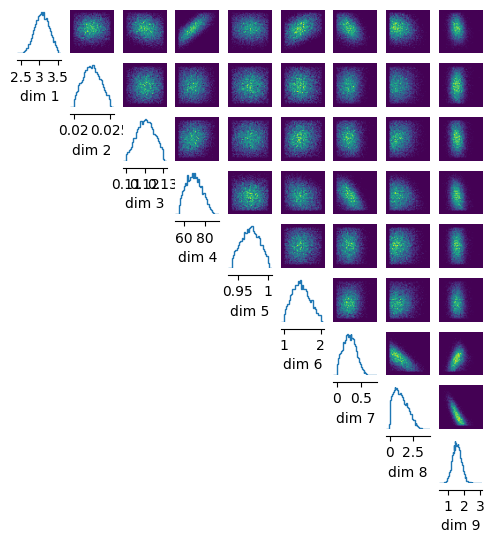

In [98]:
_ = pairplot(samples,
             # limits=[[-2, 2], [-2, 2], [-2, 2]],
             figsize=(6, 6),)
             # labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$"])

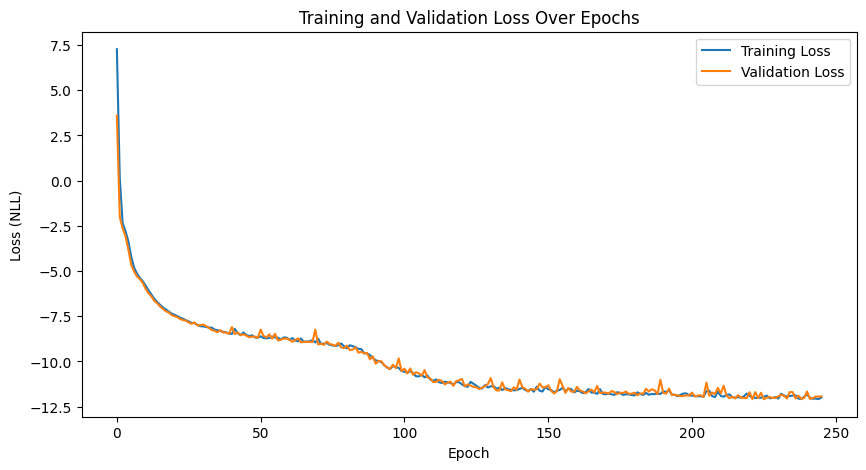

-11.99287486436632
-11.933619140625


In [99]:
# After training
# For example:

# Access the training and validation loss history
train_loss_history = inference._summary["training_loss"]
val_loss_history = inference._summary["validation_loss"]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (NLL)")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.show()
print(train_loss_history[-1])
print(val_loss_history[-1])